In [1]:
# import libraries
import pandas as pd
from pandas import DataFrame, merge
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn import preprocessing
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [2]:
# declare variable for first spreadsheet, from USDA website
url = 'https://www.ers.usda.gov/webdocs/DataFiles/53657/table14.xls?v=6753.2'

In [3]:
# declare variable for second spreadsheet from BLS website
url2 = 'https://download.bls.gov/pub/time.series/cu/cu.data.11.USFoodBeverage'

In [4]:
# declare variable for the spreadsheet on BLS website with the series name
url3 = 'https://download.bls.gov/pub/time.series/cu/cu.series'

In [5]:
# create dataframe df
df = pd.read_excel(url, parse_dates=True)

In [6]:
# examine the dataframe
df.head(10)

,"Table 14--Fuel ethanol, corn, and gasoline prices, by month",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Corn,Ethanol,Blender cost of ethanol with credit1,Gasoline,Corn cost per gallon ethanol2,Ethanol geg3
2,NaN,$ / bu.,$ / gal.,$ / gal.,$ / gal.,$ / gal.,$ / geg
3,1982-01-01 00:00:00,2.54,1.75,1.15,1.04,0.940741,2.61194
4,1982-02-01 00:00:00,2.44,1.7,1.1,1.01,0.903704,2.53731
5,1982-03-01 00:00:00,2.46,1.66,1.06,0.95,0.911111,2.47761
6,1982-04-01 00:00:00,2.55,1.7,1.1,0.9,0.944444,2.53731
7,1982-05-01 00:00:00,2.6,1.7,1.1,0.94,0.962963,2.53731
8,1982-06-01 00:00:00,2.57,1.7,1.1,1.05,0.951852,2.53731
9,1982-07-01 00:00:00,2.5,1.7,1.1,1.06,0.925926,2.53731


In [7]:
df.tail(10)

,"Table 14--Fuel ethanol, corn, and gasoline prices, by month",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
463,May-20,3.2,0.75,0.75,1.06,0.277778,1.1194
464,Jun-20,NaN,0.85,0.85,1.3,0.314815,1.26866
465,Note: Corn prices received by farmers. Ethanol...,NaN,NaN,NaN,NaN,NaN,NaN
466,NA = not available.,NaN,NaN,NaN,NaN,NaN,NaN
467,1Blenders tax credit: $0.60 per gallon through...,NaN,NaN,NaN,NaN,NaN,NaN
468,2 Based on one bushel of corn yielding 2.7 gal...,NaN,NaN,NaN,NaN,NaN,NaN
469,3geg = gasoline equivalent gallons. A gallon ...,NaN,NaN,NaN,NaN,NaN,NaN
470,NaN,NaN,NaN,NaN,NaN,NaN,NaN
471,"Sources: USDA, Economic Research Service based...",NaN,NaN,NaN,NaN,NaN,NaN
472,Updated July 2020.,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# re-write column headers
df.columns = ['Month_Year', 'Corn', 'Ethanol','Blender_cost', 'Gasoline', 'Corn_cost_per_gallon', 'Ethanol_geg']

In [9]:
# drop the first three rows and last eight rows
df1 = df.drop(df.index[0:3]).drop(df.index[-8:])

In [10]:
# examine df1
df1

,Month_Year,Corn,Ethanol,Blender_cost,Gasoline,Corn_cost_per_gallon,Ethanol_geg
3,1982-01-01 00:00:00,2.54,1.75,1.15,1.04,0.940741,2.61194
4,1982-02-01 00:00:00,2.44,1.7,1.1,1.01,0.903704,2.53731
5,1982-03-01 00:00:00,2.46,1.66,1.06,0.95,0.911111,2.47761
6,1982-04-01 00:00:00,2.55,1.7,1.1,0.9,0.944444,2.53731
7,1982-05-01 00:00:00,2.6,1.7,1.1,0.94,0.962963,2.53731
...,...,...,...,...,...,...,...
460,Feb-20,3.78,1.03,1.03,1.78,0.381481,1.53731
461,Mar-20,3.68,0.84,0.84,1.14,0.311111,1.25373
462,Apr-20,3.29,0.59,0.59,0.63,0.218519,0.880597
463,May-20,3.2,0.75,0.75,1.06,0.277778,1.1194


In [11]:
# Because the Month_Year field has mixed types, I am going to create separate columns for month and year
# create an empty list that will become a field in df1 representing month
Month = []

In [12]:
# create an empty list that will become a field in df1 representing year
Year = []

In [13]:
for i in range(0, 462):
    if len(Month) % 12 == 0:
        Month.append(1)
    else:
        Month.append(Month[-1] + 1)

In [14]:
for i in range(0, 462):
    if len(Year) == 0:
        Year.append(1982)
    elif len(Year) % 12 == 0:
        Year.append(Year[-1] + 1)
    else:
        Year.append(Year[-1])

In [15]:
# add the year column to df1
df1['Year'] = Year

In [16]:
# add the month column to df1
df1['Month'] = Month

In [17]:
# create dataframe cpi
cpi = pd.read_csv(url2, delimiter="\t")

In [18]:
# create dataframe cpi_key
cpi_key = pd.read_csv(url3, delimiter="\t")

In [19]:
# examine columns
cpi_key.columns

Index(['series_id        ', 'area_code', 'item_code', 'seasonal',
       'periodicity_code', 'base_code', 'base_period', 'series_title',
       'footnote_codes', 'begin_year', 'begin_period', 'end_year',
       'end_period'],
      dtype='object')

In [20]:
# examine cpi
cpi

,series_id,year,period,value,footnote_codes
0,CUSR0000SAF,1967,M01,34.800,NaN
1,CUSR0000SAF,1967,M02,34.700,NaN
2,CUSR0000SAF,1967,M03,34.700,NaN
3,CUSR0000SAF,1967,M04,34.600,NaN
4,CUSR0000SAF,1967,M05,34.600,NaN
...,...,...,...,...,...
134972,CUUSS000SEFV,2018,S03,239.016,NaN
134973,CUUSS000SEFV,2019,S01,244.880,NaN
134974,CUUSS000SEFV,2019,S02,248.774,NaN
134975,CUUSS000SEFV,2019,S03,246.827,NaN


In [21]:
# merge the cpi and cpi_key to lookup the series title corresponding with a given series_id
cpi2 = pd.merge(cpi, cpi_key[['series_id        ','series_title']], on='series_id        ', how='left')

In [22]:
# examine cpi2
cpi2

,series_id,year,period,value,footnote_codes,series_title
0,CUSR0000SAF,1967,M01,34.800,NaN,"Food and beverages in U.S. city average, all u..."
1,CUSR0000SAF,1967,M02,34.700,NaN,"Food and beverages in U.S. city average, all u..."
2,CUSR0000SAF,1967,M03,34.700,NaN,"Food and beverages in U.S. city average, all u..."
3,CUSR0000SAF,1967,M04,34.600,NaN,"Food and beverages in U.S. city average, all u..."
4,CUSR0000SAF,1967,M05,34.600,NaN,"Food and beverages in U.S. city average, all u..."
...,...,...,...,...,...,...
134972,CUUSS000SEFV,2018,S03,239.016,NaN,"Food away from home in Size Class A, all urban..."
134973,CUUSS000SEFV,2019,S01,244.880,NaN,"Food away from home in Size Class A, all urban..."
134974,CUUSS000SEFV,2019,S02,248.774,NaN,"Food away from home in Size Class A, all urban..."
134975,CUUSS000SEFV,2019,S03,246.827,NaN,"Food away from home in Size Class A, all urban..."


In [23]:
# extract only the numbers from the period field and convert to integer
# per https://download.bls.gov/pub/time.series/cu/cu.period, values in period with a M01-M12 are months, M13 is annual average. S01 is first half of year, S02 is second half of year, S03 is annual average
cpi_month = cpi2.period.str[1:].astype(int)

In [24]:
# create a cpi_period_type to differentiate between "m" for "month" (1-13 where 13 is annual average), and "s" for "semi-annual"
cpi_period_type = cpi2.period.str[0]

In [25]:
# add month to the cpi2 dataframe
cpi2['cpi_month'] = cpi_month

In [26]:
# add period_type to the cpi2 dataframe
cpi2['cpi_period_type'] = cpi_period_type

In [27]:
#examine cpi2
cpi2

,series_id,year,period,value,footnote_codes,series_title,cpi_month,cpi_period_type
0,CUSR0000SAF,1967,M01,34.800,NaN,"Food and beverages in U.S. city average, all u...",1,M
1,CUSR0000SAF,1967,M02,34.700,NaN,"Food and beverages in U.S. city average, all u...",2,M
2,CUSR0000SAF,1967,M03,34.700,NaN,"Food and beverages in U.S. city average, all u...",3,M
3,CUSR0000SAF,1967,M04,34.600,NaN,"Food and beverages in U.S. city average, all u...",4,M
4,CUSR0000SAF,1967,M05,34.600,NaN,"Food and beverages in U.S. city average, all u...",5,M
...,...,...,...,...,...,...,...,...
134972,CUUSS000SEFV,2018,S03,239.016,NaN,"Food away from home in Size Class A, all urban...",3,S
134973,CUUSS000SEFV,2019,S01,244.880,NaN,"Food away from home in Size Class A, all urban...",1,S
134974,CUUSS000SEFV,2019,S02,248.774,NaN,"Food away from home in Size Class A, all urban...",2,S
134975,CUUSS000SEFV,2019,S03,246.827,NaN,"Food away from home in Size Class A, all urban...",3,S


In [28]:
# remove any values that are not "m"
cpi_m = cpi2.drop(cpi2[cpi2['cpi_period_type'] != 'M'].index)

In [29]:
# ensure that all values for cpi_period_type are m
cpi_m.cpi_period_type.value_counts()

M    132237
Name: cpi_period_type, dtype: int64

In [30]:
# create a pivot table so that the year/month combined represents a row, and that each price category is a column
cpi_pt =  pd.pivot_table(cpi_m, values='       value', index=['year', 'cpi_month'], columns=['series_title'])

In [31]:
# examine the pivot table
cpi_pt.loc[(1982,1)]['Poultry in U.S. city average, all urban consumers, not seasonally adjusted']

95.3

In [32]:
# check percentage of missing data since 1982
for i in cpi_pt.columns:
    not_missing = cpi_pt.loc[1982:][i].count()
    col_size = len(cpi_pt.loc[1982:][i])
    percent_unique_values = "{:.2%}".format(not_missing/col_size)
    print(i + ' : ' + percent_unique_values)

Alcoholic beverages at home in U.S. city average, all urban consumers, not seasonally adjusted : 100.00%
Alcoholic beverages at home in U.S. city average, all urban consumers, seasonally adjusted : 92.43%
Alcoholic beverages away from home in U.S. city average, all urban consumers, not seasonally adjusted : 100.00%
Alcoholic beverages away from home in U.S. city average, all urban consumers, seasonally adjusted : 92.43%
Alcoholic beverages in Size Class A, all urban consumers, not seasonally adjusted : 87.25%
Alcoholic beverages in Size Class B/C, all urban consumers, not seasonally adjusted : 58.76%
Alcoholic beverages in U.S. city average, all urban consumers, not seasonally adjusted : 100.00%
Alcoholic beverages in U.S. city average, all urban consumers, seasonally adjusted : 92.43%
Apples in U.S. city average, all urban consumers, not seasonally adjusted : 100.00%
Apples in U.S. city average, all urban consumers, seasonally adjusted : 92.43%
Baby food in U.S. city average, all urba

Meats in U.S. city average, all urban consumers, seasonally adjusted : 92.43%
Meats, poultry, and fish in U.S. city average, all urban consumers, not seasonally adjusted : 100.00%
Meats, poultry, and fish in U.S. city average, all urban consumers, seasonally adjusted : 92.43%
Meats, poultry, fish, and eggs in Size Class A, all urban consumers, not seasonally adjusted : 7.17%
Meats, poultry, fish, and eggs in Size Class B/C, all urban consumers, not seasonally adjusted : 7.17%
Meats, poultry, fish, and eggs in U.S. city average, all urban consumers, not seasonally adjusted : 100.00%
Meats, poultry, fish, and eggs in U.S. city average, all urban consumers, seasonally adjusted : 92.43%
Milk in U.S. city average, all urban consumers, not seasonally adjusted : 58.76%
Milk in U.S. city average, all urban consumers, seasonally adjusted : 51.79%
Nonalcoholic beverages and beverage materials in Size Class A, all urban consumers, not seasonally adjusted : 7.17%
Nonalcoholic beverages and beverag

In [33]:
# I selected the series that I will use for this study that cover a wide range of food products, 
# and only not-seasonally adjusted to match the ethanol information, and where there is complete data since 1982
sel_cols = ['Alcoholic beverages at home in U.S. city average, all urban consumers, not seasonally adjusted', 'Cakes, cupcakes, and cookies in U.S. city average, all urban consumers, not seasonally adjusted', 'Carbonated drinks in U.S. city average, all urban consumers, not seasonally adjusted', 'Breakfast cereal in U.S. city average, all urban consumers, not seasonally adjusted', 'Cereals and cereal products in U.S. city average, all urban consumers, not seasonally adjusted', 'Fats and oils in U.S. city average, all urban consumers, not seasonally adjusted', 'Fish and seafood in U.S. city average, all urban consumers, not seasonally adjusted', 'Flour and prepared flour mixes in U.S. city average, all urban consumers, not seasonally adjusted', 'Food in U.S. city average, all urban consumers, not seasonally adjusted', 'Frozen vegetables in U.S. city average, all urban consumers, not seasonally adjusted', 'Fruits and vegetables in U.S. city average, all urban consumers, not seasonally adjusted', 'Meats in U.S. city average, all urban consumers, not seasonally adjusted', 'Poultry in U.S. city average, all urban consumers, not seasonally adjusted', 'Dairy and related products in U.S. city average, all urban consumers, not seasonally adjusted','Ham in U.S. city average, all urban consumers, not seasonally adjusted'
,'Beef and veal in U.S. city average, all urban consumers, not seasonally adjusted','Rice, pasta, cornmeal in U.S. city average, all urban consumers, not seasonally adjusted']

In [34]:
# Drop all columns that are not on the list of sel_cols
cpi_p = cpi_pt.drop(cpi_pt.iloc[:,cpi_pt.columns.isin(sel_cols)==False], axis=1)

In [35]:
#drop all values before 1982
# question - why does this not work: cpi_f = cpi_p.drop(cpi_p.loc[:(1982,1)])
cpi_f = cpi_p.drop(cpi_p.index[:897])

In [36]:
cpi_f

series_title    Alcoholic beverages at home in U.S. city average, all urban consumers, not seasonally adjusted  \
year cpi_month                                                                                                   
1982 1                                                     95.000                                                
     2                                                     95.800                                                
     3                                                     96.300                                                
     4                                                     96.700                                                
     5                                                     97.000                                                
...                                                           ...                                                
2020 4                                                    209.282                                                
     5                                                    209.557                                                
     6                                                    209.412                                                
     7                                                    209.356                                                
     8                                                    209.118                                                

series_title    Beef and veal in U.S. city average, all urban consumers, not seasonally adjusted  \
year cpi_month                                                                                     
1982 1                                                     98.000                                  
     2                                                     98.800                                  
     3                                                     98.900                                  
     4                                                    100.000                                  
     5                                                    102.300                                  
...                                                           ...                                  
2020 4                                                    329.503                                  
     5                                                    365.484                                  
     6                                                    385.495                                  
     7                                                    354.009                                  
     8                                                    337.768                                  

series_title    Breakfast cereal in U.S. city average, all urban consumers, not seasonally adjusted  \
year cpi_month                                                                                        
1982 1                                                     93.100                                     
     2                                                     94.100                                     
     3                                                     94.300                                     
     4                                                     94.400                                     
     5                                                     94.600                                     
...                                                           ...                                     
2020 4                                                    224.844                                     
     5                                                    228.013                                     
     6                                                    230.490                                     
     7                                                    226.335                  

In [37]:
#combine the USDA dataframe with the CPI data by joining on year and month
combined = pd.merge(df1, cpi_f, left_on=['Year','Month'], right_on=['year','cpi_month'])

In [38]:
combined.describe()

,Year,Month,"Alcoholic beverages at home in U.S. city average, all urban consumers, not seasonally adjusted","Beef and veal in U.S. city average, all urban consumers, not seasonally adjusted","Breakfast cereal in U.S. city average, all urban consumers, not seasonally adjusted","Cakes, cupcakes, and cookies in U.S. city average, all urban consumers, not seasonally adjusted","Carbonated drinks in U.S. city average, all urban consumers, not seasonally adjusted","Cereals and cereal products in U.S. city average, all urban consumers, not seasonally adjusted","Dairy and related products in U.S. city average, all urban consumers, not seasonally adjusted","Fats and oils in U.S. city average, all urban consumers, not seasonally adjusted","Fish and seafood in U.S. city average, all urban consumers, not seasonally adjusted","Flour and prepared flour mixes in U.S. city average, all urban consumers, not seasonally adjusted","Food in U.S. city average, all urban consumers, not seasonally adjusted","Frozen vegetables in U.S. city average, all urban consumers, not seasonally adjusted","Fruits and vegetables in U.S. city average, all urban consumers, not seasonally adjusted","Ham in U.S. city average, all urban consumers, not seasonally adjusted","Meats in U.S. city average, all urban consumers, not seasonally adjusted","Poultry in U.S. city average, all urban consumers, not seasonally adjusted","Rice, pasta, cornmeal in U.S. city average, all urban consumers, not seasonally adjusted"
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,2000.753247,6.461039,158.118225,183.909459,186.253883,196.693844,130.491379,177.216110,163.533955,163.000513,196.953656,173.170491,176.660745,159.554167,210.495290,159.071866,170.560379,169.390455,167.815439
std,11.127916,3.455574,33.758970,72.671277,40.157365,60.600935,22.582663,43.432121,43.363523,44.833483,61.242186,52.267273,50.817911,35.984652,68.433349,36.479032,53.861898,44.568401,50.930526
min,1982.000000,1.000000,95.000000,95.000000,93.100000,94.200000,96.700000,96.800000,98.300000,95.500000,96.800000,97.800000,95.800000,93.300000,91.900000,93.400000,96.000000,93.500000,97.800000
25%,1991.000000,3.000000,138.450000,131.900000,168.500000,151.175000,113.725000,148.050000,127.075000,129.800000,149.425000,127.375000,136.550000,129.775000,153.750000,134.950000,131.100000,133.150000,126.650000
50%,2001.000000,6.000000,160.550000,159.650000,198.750000,191.050000,124.100000,177.950000,164.000000,153.250000,189.200000,165.100000,171.800000,164.450000,211.650000,157.400000,157.950000,162.450000,153.650000
75%,2010.000000,9.000000,191.295250,229.569750,218.227250,252.207250,156.411000,222.590500,210.555250,206.842000,247.939000,231.202500,220.616750,196.582250,280.984250,191.971500,211.844750,206.094750,231.166000
max,2020.000000,12.000000,209.557000,385.495000,231.909000,298.935000,182.446000,236.930000,230.166000,234.392000,313.424000,258.791000,269.770000,212.813000,306.798000,239.559000,298.033000,252.765000,249.304000


In [39]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462 entries, 0 to 461
Data columns (total 26 columns):
 #   Column                                                                                             Non-Null Count  Dtype  
---  ------                                                                                             --------------  -----  
 0   Month_Year                                                                                         462 non-null    object 
 1   Corn                                                                                               461 non-null    object 
 2   Ethanol                                                                                            462 non-null    object 
 3   Blender_cost                                                                                       462 non-null    object 
 4   Gasoline                                                                                           462 non-null    object 

In [40]:
# for loop to change all values to numeric except for Month_Year
for i in combined.columns:
    if i != 'Month_Year':
        combined[i] = pd.to_numeric(combined[i])

In [41]:
# check data types
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462 entries, 0 to 461
Data columns (total 26 columns):
 #   Column                                                                                             Non-Null Count  Dtype  
---  ------                                                                                             --------------  -----  
 0   Month_Year                                                                                         462 non-null    object 
 1   Corn                                                                                               461 non-null    float64
 2   Ethanol                                                                                            462 non-null    float64
 3   Blender_cost                                                                                       462 non-null    float64
 4   Gasoline                                                                                           462 non-null    float64

In [42]:
#shorten column names
combined.columns = combined.columns.str.replace(' in U.S. city average, all urban consumers, not seasonally adjusted', '')

In [43]:
# get summary statistics
combined.describe()

,Corn,Ethanol,Blender_cost,Gasoline,Corn_cost_per_gallon,Ethanol_geg,Year,Month,Alcoholic beverages at home,Beef and veal,...,Fats and oils,Fish and seafood,Flour and prepared flour mixes,Food,Frozen vegetables,Fruits and vegetables,Ham,Meats,Poultry,"Rice, pasta, cornmeal"
count,461.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,...,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,3.028091,1.567684,1.142835,1.310152,1.109388,2.339827,2000.753247,6.461039,158.118225,183.909459,...,163.000513,196.953656,173.170491,176.660745,159.554167,210.495290,159.071866,170.560379,169.390455,167.815439
std,1.242822,0.515385,0.612010,0.811615,0.468614,0.769231,11.127916,3.455574,33.758970,72.671277,...,44.833483,61.242186,52.267273,50.817911,35.984652,68.433349,36.479032,53.861898,44.568401,50.930526
min,1.400000,0.590000,0.150000,0.360000,0.218519,0.880597,1982.000000,1.000000,95.000000,95.000000,...,95.500000,96.800000,97.800000,95.800000,93.300000,91.900000,93.400000,96.000000,93.500000,97.800000
25%,2.170000,1.182500,0.650000,0.630000,0.796296,1.764925,1991.000000,3.000000,138.450000,131.900000,...,129.800000,149.425000,127.375000,136.550000,129.775000,153.750000,134.950000,131.100000,133.150000,126.650000
50%,2.600000,1.430000,0.980000,0.940000,0.955556,2.134328,2001.000000,6.000000,160.550000,159.650000,...,153.250000,189.200000,165.100000,171.800000,164.450000,211.650000,157.400000,157.950000,162.450000,153.650000
75%,3.560000,1.720000,1.517500,1.927500,1.317593,2.567164,2010.000000,9.000000,191.295250,229.569750,...,206.842000,247.939000,231.202500,220.616750,196.582250,280.984250,191.971500,211.844750,206.094750,231.166000
max,7.630000,3.580000,3.150000,3.370000,2.825926,5.343284,2020.000000,12.000000,209.557000,385.495000,...,234.392000,313.424000,258.791000,269.770000,212.813000,306.798000,239.559000,298.033000,252.765000,249.304000


In [44]:
combined['Date'] = pd.to_datetime(combined[['Month', 'Year']].assign(Day=1))

In [45]:
combined.Date

0     1982-01-01
1     1982-02-01
2     1982-03-01
3     1982-04-01
4     1982-05-01
         ...    
457   2020-02-01
458   2020-03-01
459   2020-04-01
460   2020-05-01
461   2020-06-01
Name: Date, Length: 462, dtype: datetime64[ns]

In [46]:
combined = combined.set_index('Date')

In [47]:
combined = combined.drop(['Month_Year'], 1)

In [48]:
combined.head(20)

,Corn,Ethanol,Blender_cost,Gasoline,Corn_cost_per_gallon,Ethanol_geg,Year,Month,Alcoholic beverages at home,Beef and veal,...,Fats and oils,Fish and seafood,Flour and prepared flour mixes,Food,Frozen vegetables,Fruits and vegetables,Ham,Meats,Poultry,"Rice, pasta, cornmeal"
Date,,,,,,,,,,,,,,,,,,,,,
1982-01-01,2.54,1.75,1.15,1.04,0.940741,2.611940,1982,1,95.0,98.0,...,96.8,98.9,97.8,95.8,93.3,98.1,94.4,96.0,95.3,102.0
1982-02-01,2.44,1.70,1.10,1.01,0.903704,2.537313,1982,2,95.8,98.8,...,96.4,99.0,97.8,96.6,94.0,100.4,94.3,96.9,96.1,102.9
1982-03-01,2.46,1.66,1.06,0.95,0.911111,2.477612,1982,3,96.3,98.9,...,96.1,99.7,97.9,96.4,94.2,97.6,95.8,97.3,95.6,102.1
1982-04-01,2.55,1.70,1.10,0.90,0.944444,2.537313,1982,4,96.7,100.0,...,96.4,101.2,98.2,96.8,95.5,97.9,93.4,98.2,94.9,101.0
1982-05-01,2.60,1.70,1.10,0.94,0.962963,2.537313,1982,5,97.0,102.3,...,96.4,97.0,99.7,97.3,95.5,99.2,97.1,100.4,96.2,101.4
1982-06-01,2.57,1.70,1.10,1.05,0.951852,2.537313,1982,6,97.0,104.9,...,96.5,96.8,99.9,98.1,96.6,101.8,98.4,103.2,97.0,100.9
1982-07-01,2.50,1.70,1.10,1.06,0.925926,2.537313,1982,7,97.4,104.3,...,96.0,98.1,100.9,98.3,97.3,99.8,100.3,103.8,98.0,100.5
1982-08-01,2.30,1.70,1.10,1.05,0.851852,2.537313,1982,8,97.8,102.1,...,95.6,97.4,99.5,97.9,98.0,97.0,101.4,103.0,96.3,100.8
1982-09-01,2.15,1.70,1.10,1.03,0.796296,2.537313,1982,9,97.7,101.6,...,95.6,97.9,99.4,98.0,98.2,94.6,104.6,103.7,96.3,100.1


In [49]:
# Save the DF as a csv file for convenience and future use
FoodFuel = combined.to_csv('FoodFuel.csv', index=True)

In [50]:
# rename the dataframe
FF1 = combined
FF1.tail()

,Corn,Ethanol,Blender_cost,Gasoline,Corn_cost_per_gallon,Ethanol_geg,Year,Month,Alcoholic beverages at home,Beef and veal,...,Fats and oils,Fish and seafood,Flour and prepared flour mixes,Food,Frozen vegetables,Fruits and vegetables,Ham,Meats,Poultry,"Rice, pasta, cornmeal"
Date,,,,,,,,,,,,,,,,,,,,,
2020-02-01,3.78,1.03,1.03,1.78,0.381481,1.537313,2020,2,207.030,314.232,...,226.890,298.721,234.170,261.876,201.604,299.817,209.558,260.417,232.820,239.446
2020-03-01,3.68,0.84,0.84,1.14,0.311111,1.253731,2020,3,208.219,316.270,...,228.497,297.550,235.939,262.708,201.175,299.641,219.842,261.489,235.803,238.912
2020-04-01,3.29,0.59,0.59,0.63,0.218519,0.880597,2020,4,209.282,329.503,...,230.824,311.987,238.985,266.757,207.732,304.809,210.336,270.149,246.991,244.852
2020-05-01,3.20,0.75,0.75,1.06,0.277778,1.119403,2020,5,209.557,365.484,...,231.069,313.424,240.779,268.439,209.380,306.798,221.910,286.185,252.418,249.304
2020-06-01,NaN,0.85,0.85,1.30,0.314815,1.268657,2020,6,209.412,385.495,...,230.438,310.716,244.665,269.770,210.497,305.393,227.745,298.033,252.765,248.073


In [51]:
FF1.dtypes

Corn                              float64
Ethanol                           float64
Blender_cost                      float64
Gasoline                          float64
Corn_cost_per_gallon              float64
Ethanol_geg                       float64
Year                                int64
Month                               int64
Alcoholic beverages at home       float64
Beef and veal                     float64
Breakfast cereal                  float64
Cakes, cupcakes, and cookies      float64
Carbonated drinks                 float64
Cereals and cereal products       float64
Dairy and related products        float64
Fats and oils                     float64
Fish and seafood                  float64
Flour and prepared flour mixes    float64
Food                              float64
Frozen vegetables                 float64
Fruits and vegetables             float64
Ham                               float64
Meats                             float64
Poultry                           

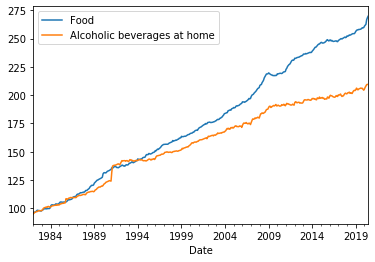

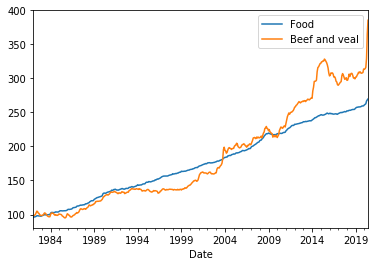

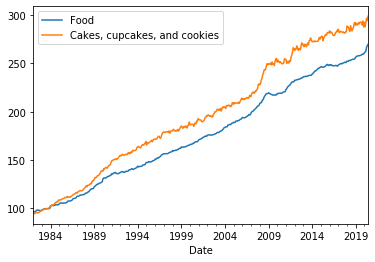

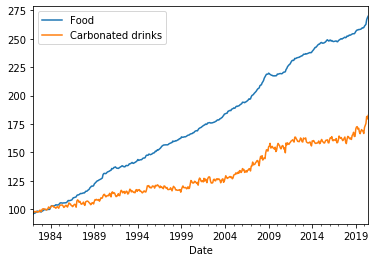

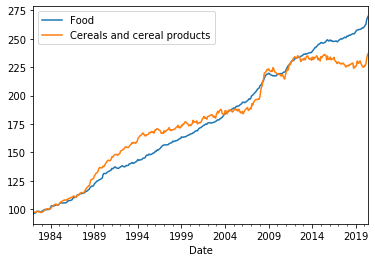

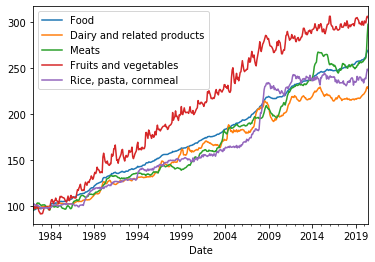

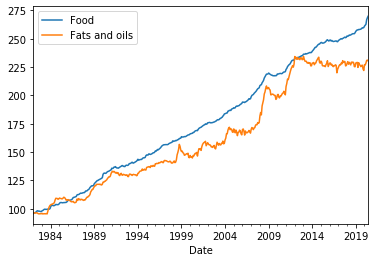

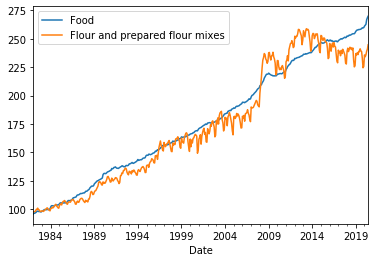

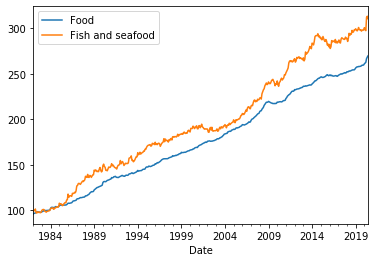

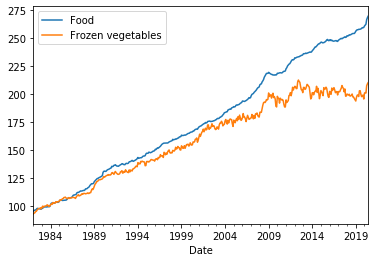

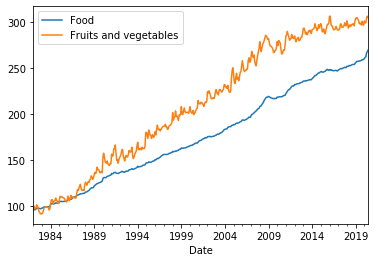

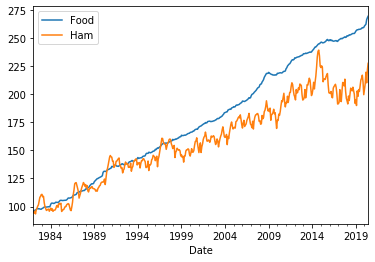

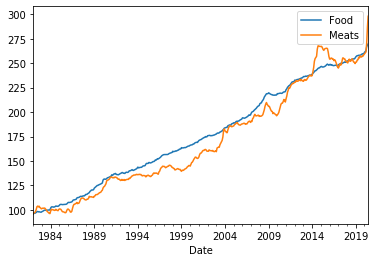

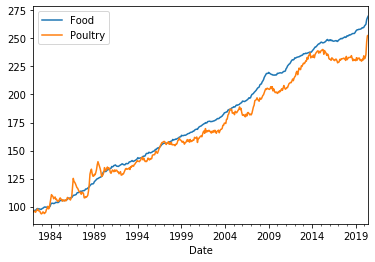

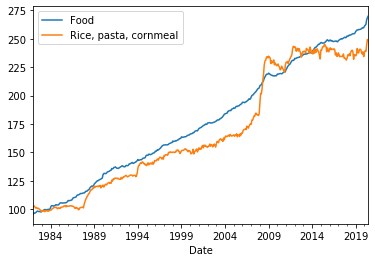

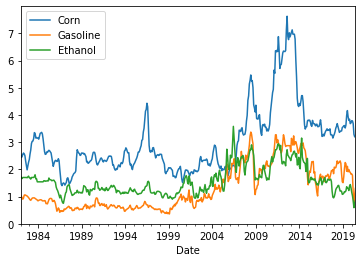

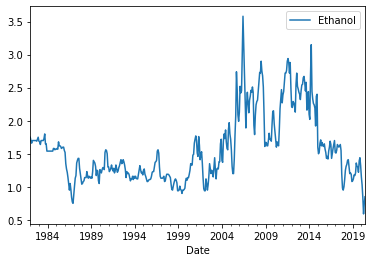

In [52]:
#plot the time series
FF1[['Food','Alcoholic beverages at home']].plot()
FF1[['Food','Beef and veal']].plot()
FF1[['Food','Cakes, cupcakes, and cookies']].plot()
FF1[['Food','Carbonated drinks']].plot()
FF1[['Food','Cereals and cereal products']].plot()
FF1[['Food','Dairy and related products','Meats','Fruits and vegetables','Rice, pasta, cornmeal']].plot()
FF1[['Food','Fats and oils']].plot()
FF1[['Food','Flour and prepared flour mixes']].plot()
FF1[['Food','Fish and seafood']].plot()
FF1[['Food','Frozen vegetables']].plot()
FF1[['Food','Fruits and vegetables']].plot()
FF1[['Food','Ham']].plot()
FF1[['Food','Meats']].plot()
FF1[['Food','Poultry']].plot()
FF1[['Food','Rice, pasta, cornmeal']].plot()
FF1[['Corn','Gasoline','Ethanol']].plot()
FF1[['Ethanol']].plot()

In [53]:
# Based on the EDA, I will examine the impact of Ethanol on the following 5 y-variables and compare the effect: Food generally, Meats, Fruits and Vegetables, Rice Pasta Cornmeal and Dairy
FF2 =FF1[['Ethanol','Food','Meats','Fruits and vegetables','Rice, pasta, cornmeal','Dairy and related products']]
FF2.columns = ['Ethanol','Food','Meats','Fruits_veg','Rice_pasta_cornmeal','Dairy']

In [54]:
#Calculate Annual Differences
FFc = FF2 - FF2.shift(12)

In [55]:
FFc = FFc.iloc[13:]
FFc.head()

,Ethanol,Food,Meats,Fruits_veg,Rice_pasta_cornmeal,Dairy
Date,,,,,,
1983-02-01,-0.02,1.9,4.8,-7.8,-4.8,1.3
1983-03-01,-0.02,2.6,4.3,-2.1,-3.5,1.2
1983-04-01,0.00,2.7,3.6,0.3,-2.5,1.0
1983-05-01,0.00,2.4,1.2,0.1,-3.6,1.3
1983-06-01,0.00,1.4,-2.6,-2.5,-2.2,1.4


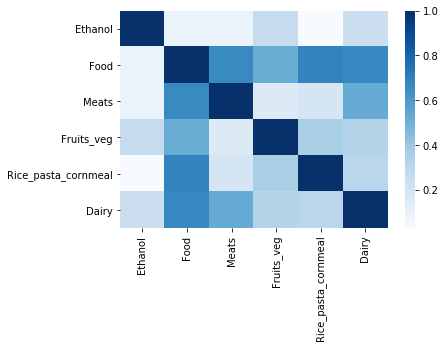

In [56]:
# Plot the correlations
FFc1 = FFc.corr()
sns.heatmap(FFc1, cmap='Blues')

In [57]:
#check for stationarity
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(6, 4))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test for:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput) 

Ethanol


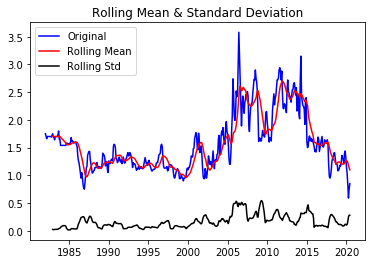

Results of Dickey-Fuller Test for:
Test Statistic                  -2.111951
p-value                          0.239736
#Lags Used                       6.000000
Number of Observations Used    455.000000
Critical Value (1%)             -3.444804
Critical Value (5%)             -2.867913
Critical Value (10%)            -2.570165
dtype: float64
Food


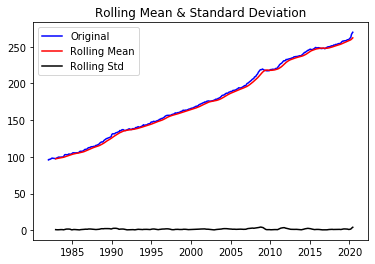

Results of Dickey-Fuller Test for:
Test Statistic                   1.089340
p-value                          0.995125
#Lags Used                      14.000000
Number of Observations Used    447.000000
Critical Value (1%)             -3.445064
Critical Value (5%)             -2.868028
Critical Value (10%)            -2.570226
dtype: float64
Meats


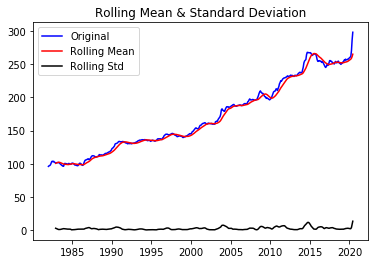

Results of Dickey-Fuller Test for:
Test Statistic                   1.401380
p-value                          0.997120
#Lags Used                       4.000000
Number of Observations Used    457.000000
Critical Value (1%)             -3.444740
Critical Value (5%)             -2.867885
Critical Value (10%)            -2.570150
dtype: float64
Fruits_veg


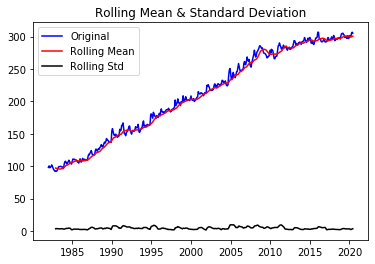

Results of Dickey-Fuller Test for:
Test Statistic                  -1.653558
p-value                          0.455186
#Lags Used                      16.000000
Number of Observations Used    445.000000
Critical Value (1%)             -3.445131
Critical Value (5%)             -2.868057
Critical Value (10%)            -2.570241
dtype: float64
Rice_pasta_cornmeal


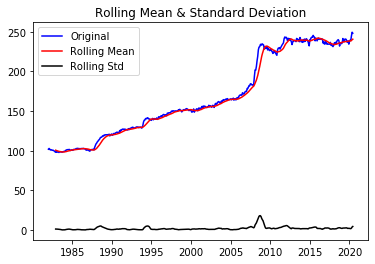

Results of Dickey-Fuller Test for:
Test Statistic                  -0.162672
p-value                          0.942827
#Lags Used                       8.000000
Number of Observations Used    453.000000
Critical Value (1%)             -3.444868
Critical Value (5%)             -2.867941
Critical Value (10%)            -2.570180
dtype: float64
Dairy


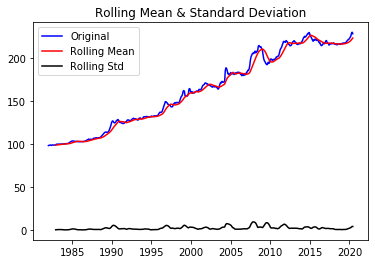

Results of Dickey-Fuller Test for:
Test Statistic                  -0.634421
p-value                          0.863013
#Lags Used                      10.000000
Number of Observations Used    451.000000
Critical Value (1%)             -3.444933
Critical Value (5%)             -2.867970
Critical Value (10%)            -2.570195
dtype: float64


In [58]:
# test the stationarity of each variable with actual prices
for i in FF2.columns:
    print (i)
    test_stationarity(FF2[i])

Ethanol


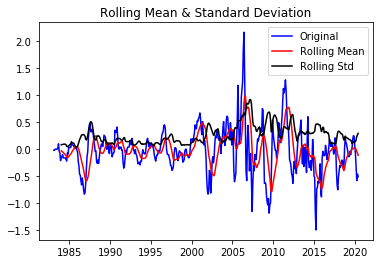

Results of Dickey-Fuller Test for:
Test Statistic                  -4.471755
p-value                          0.000221
#Lags Used                      14.000000
Number of Observations Used    434.000000
Critical Value (1%)             -3.445508
Critical Value (5%)             -2.868223
Critical Value (10%)            -2.570330
dtype: float64
Food


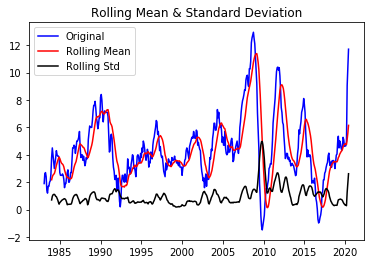

Results of Dickey-Fuller Test for:
Test Statistic                  -4.505704
p-value                          0.000192
#Lags Used                      18.000000
Number of Observations Used    430.000000
Critical Value (1%)             -3.445649
Critical Value (5%)             -2.868285
Critical Value (10%)            -2.570363
dtype: float64
Meats


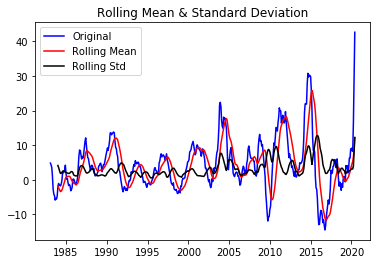

Results of Dickey-Fuller Test for:
Test Statistic                  -3.445326
p-value                          0.009507
#Lags Used                      13.000000
Number of Observations Used    435.000000
Critical Value (1%)             -3.445473
Critical Value (5%)             -2.868207
Critical Value (10%)            -2.570321
dtype: float64
Fruits_veg


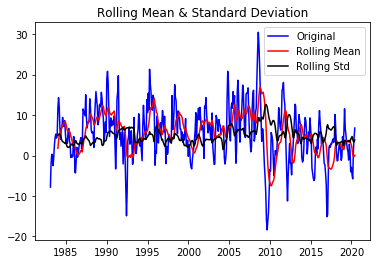

Results of Dickey-Fuller Test for:
Test Statistic                  -4.031944
p-value                          0.001252
#Lags Used                      17.000000
Number of Observations Used    431.000000
Critical Value (1%)             -3.445614
Critical Value (5%)             -2.868269
Critical Value (10%)            -2.570354
dtype: float64
Rice_pasta_cornmeal


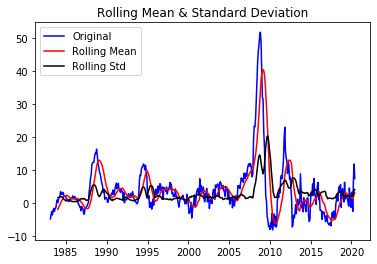

Results of Dickey-Fuller Test for:
Test Statistic                  -4.371129
p-value                          0.000334
#Lags Used                      16.000000
Number of Observations Used    432.000000
Critical Value (1%)             -3.445578
Critical Value (5%)             -2.868254
Critical Value (10%)            -2.570346
dtype: float64
Dairy


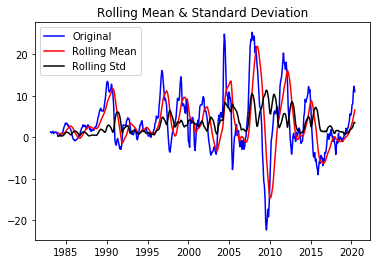

Results of Dickey-Fuller Test for:
Test Statistic                -6.270194e+00
p-value                        4.021872e-08
#Lags Used                     1.700000e+01
Number of Observations Used    4.310000e+02
Critical Value (1%)           -3.445614e+00
Critical Value (5%)           -2.868269e+00
Critical Value (10%)          -2.570354e+00
dtype: float64


In [59]:
# test the stationarity of each variable with annual differences
for i in FFc.columns:
    print (i)
    test_stationarity(FFc[i])

In [60]:
# Since the annual differences are stationary, I will prepare for an OLS regression model
# I will add a constant to be able to run the OLS with a y-intercept
FF3 = sm.add_constant(FFc)

In [61]:
#split into train and test. After looking at what I believe is a COVID-related anomaly, I took out the last 3 months
FFtr = FF3.iloc[:360]
FFts = FF3.iloc[360:-3]

In [62]:
# scale the variables to visualize them
scaler = preprocessing.StandardScaler()
ethanol_scaled = scaler.fit_transform(FF3[['Ethanol']])
food_scaled = scaler.fit_transform(FF3[['Food']])
meats_scaled = scaler.fit_transform(FF3[['Meats']])
fv_scaled = scaler.fit_transform(FF3[['Fruits_veg']])
rpc_scaled = scaler.fit_transform(FF3[['Rice_pasta_cornmeal']])
dairy_scaled = scaler.fit_transform(FF3[['Dairy']])

In [63]:
# I created a new dataframe to plot each scaled variable against scaled Ethanol to see if they seem to match up visually
Df = FF3.assign(Ethanol_Scaled = ethanol_scaled).assign(Food_scaled = food_scaled).assign(Meats_Scaled = meats_scaled).assign(FV_Scaled = fv_scaled).assign(RPC_Scaled = rpc_scaled).assign(Dairy_Scaled = dairy_scaled)

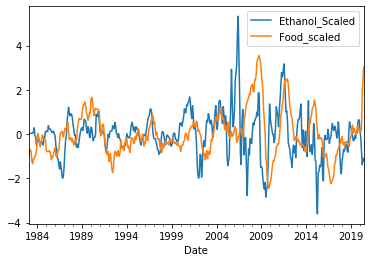

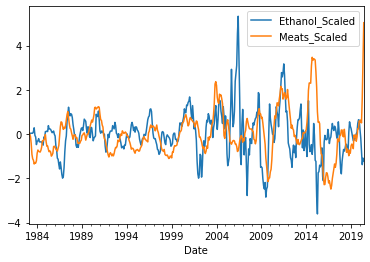

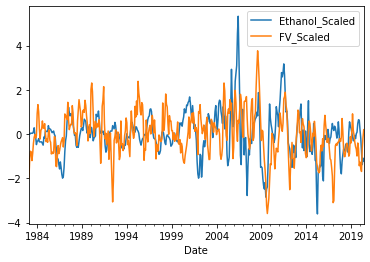

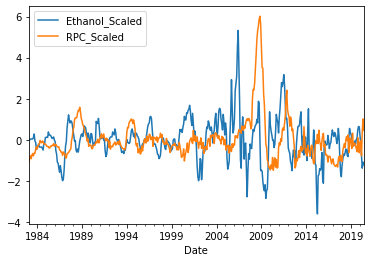

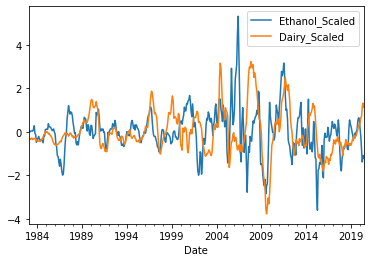

In [64]:
# visualize the relationship with the scaled variables
Df[['Ethanol_Scaled','Food_scaled']].plot()
Df[['Ethanol_Scaled','Meats_Scaled']].plot()
Df[['Ethanol_Scaled','FV_Scaled']].plot()
Df[['Ethanol_Scaled','RPC_Scaled']].plot()
Df[['Ethanol_Scaled','Dairy_Scaled']].plot()

It seems like there may be a relationship, maybe with a lag. I will run the regression without a lag and then test several lags to see if one fits well.


In [65]:
# create empty lists as column names for a soon-to-be created dataframe
el = []
la = []
res = []
rd = []
for i in FFts.columns:
    fr = str(i) + '_pred'
    ie = str(i) + '_test'
    nd = str(i) + '_residuals'
    r_2 = str(i) + '_r2'
    el.append(fr)
    la.append(ie)
    res.append(nd)
    rd.append(r_2)
# create an empty dictionary to store residuals
resultsd = {}

In [66]:
# loop through the y-variables, regressing each against Ethanol and store the residuals
for i in range(2,7):
    OLSModel = sm.OLS(FFtr.iloc[:,i],FFtr[['const','Ethanol']]).fit()
    rr = OLSModel.summary()
    print(rr)
    y_pred = OLSModel.predict(FFts[['Ethanol','const']])
    resultsd[el[i]] = y_pred
    resultsd[la[i]] = FFts.iloc[:,i]
    resultsd[res[i]] = (y_pred - FFts.iloc[:,i])
    resultsd[rd[i]] = OLSModel.rsquared

                            OLS Regression Results                            
Dep. Variable:                   Food   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     6.948
Date:                Sun, 20 Sep 2020   Prob (F-statistic):            0.00876
Time:                        20:03:27   Log-Likelihood:                -824.62
No. Observations:                 360   AIC:                             1653.
Df Residuals:                     358   BIC:                             1661.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5329      0.127     35.818      0.0

In [67]:
resultsdf = pd.DataFrame(resultsd)

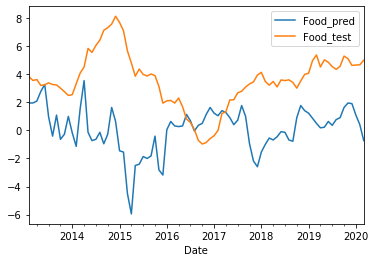

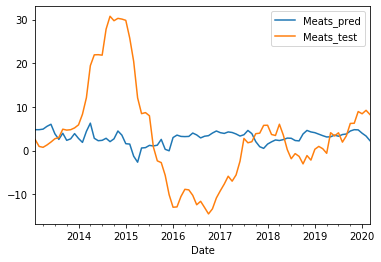

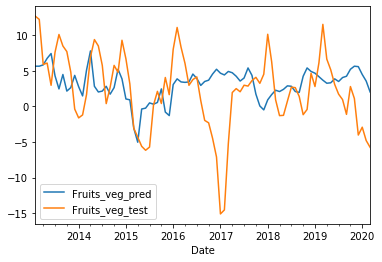

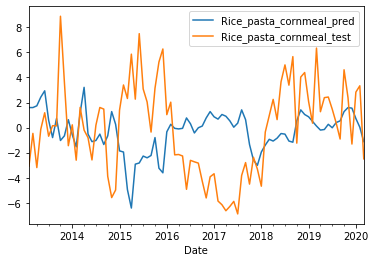

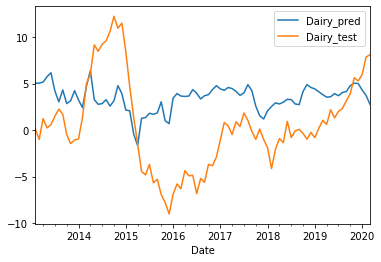

In [68]:
# plot the predicted against the test
resultsdf[['Food_pred','Food_test']].plot()
resultsdf[['Meats_pred','Meats_test']].plot()
resultsdf[['Fruits_veg_pred','Fruits_veg_test']].plot()
resultsdf[['Rice_pasta_cornmeal_pred','Rice_pasta_cornmeal_test']].plot()
resultsdf[['Dairy_pred','Dairy_test']].plot()

In [69]:
# check the different lags
rrdf = {}
for i in range(2,7):
    lags_food = {}
    xv = FF3.iloc[:,i]
    for j in range(1, 20):
        OLSModel_food_lag = sm.OLS(xv.iloc[j:360+j].values,FF3[['const','Ethanol']].iloc[:360].values).fit()
        print('Lags' + str(j))
        print(OLSModel_food_lag.summary())
        y_pred = OLSModel.predict(FF3[['const','Ethanol']].iloc[360:-j])
        y_test = xv.iloc[360+j:]
        residuals = (y_pred - y_test)**2
        mean_squared_deviation = np.mean(residuals)
        lags_food[j] = (mean_squared_deviation, OLSModel_food_lag.rsquared)
        vx = lags_food[j]
    rrdf[i] = lags_food

Lags1
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     15.00
Date:                Sun, 20 Sep 2020   Prob (F-statistic):           0.000128
Time:                        20:03:28   Log-Likelihood:                -820.14
No. Observations:                 360   AIC:                             1644.
Df Residuals:                     358   BIC:                             1652.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5300      0.125     36.245   

Lags12
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     16.98
Date:                Sun, 20 Sep 2020   Prob (F-statistic):           4.69e-05
Time:                        20:03:29   Log-Likelihood:                -815.52
No. Observations:                 360   AIC:                             1635.
Df Residuals:                     358   BIC:                             1643.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5564      0.123     36.926  

Lags4
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     64.35
Date:                Sun, 20 Sep 2020   Prob (F-statistic):           1.50e-14
Time:                        20:03:29   Log-Likelihood:                -1127.2
No. Observations:                 360   AIC:                             2258.
Df Residuals:                     358   BIC:                             2266.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2136      0.293     14.366   

[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
Lags15
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8860
Date:                Sun, 20 Sep 2020   Prob (F-statistic):              0.347
Time:                        20:03:29   Log-Likelihood:                -1150.3
No. Observations:                 360   AIC:                             2305.
Df Residuals:                     358   BIC:                             2312.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     18.83
Date:                Sun, 20 Sep 2020   Prob (F-statistic):           1.86e-05
Time:                        20:03:29   Log-Likelihood:                -1183.7
No. Observations:                 360   AIC:                             2371.
Df Residuals:                     358   BIC:                             2379.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3184      0.343     18.416      0.0

Lags18
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                  0.004767
Date:                Sun, 20 Sep 2020   Prob (F-statistic):              0.945
Time:                        20:03:29   Log-Likelihood:                -1193.7
No. Observations:                 360   AIC:                             2391.
Df Residuals:                     358   BIC:                             2399.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3316      0.353     17.947  

[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
Lags9
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     15.51
Date:                Sun, 20 Sep 2020   Prob (F-statistic):           9.85e-05
Time:                        20:03:30   Log-Likelihood:                -1272.1
No. Observations:                 360   AIC:                             2548.
Df Residuals:                     358   BIC:                             2556.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

Lags1
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     30.71
Date:                Sun, 20 Sep 2020   Prob (F-statistic):           5.82e-08
Time:                        20:03:30   Log-Likelihood:                -1198.3
No. Observations:                 360   AIC:                             2401.
Df Residuals:                     358   BIC:                             2408.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8338      0.357     10.729   

Lags13
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.3212
Date:                Sun, 20 Sep 2020   Prob (F-statistic):              0.571
Time:                        20:03:30   Log-Likelihood:                -1213.7
No. Observations:                 360   AIC:                             2431.
Df Residuals:                     358   BIC:                             2439.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9066      0.373     10.476  

In [70]:
# Plot the DataFrame with mean squared deviations and r2 scores
rrdf1 = pd.DataFrame(rrdf)
rrdf1.columns = ['Food msd/r2','Meats msd/r2','Fruits_veg msd/r2','Rice_pasta_cornmeal msd/r2','Dairy msd/r2']
rrdf1

,Food msd/r2,Meats msd/r2,Fruits_veg msd/r2,Rice_pasta_cornmeal msd/r2,Dairy msd/r2
1,"(8.25447710406636, 0.040217913910941205)","(141.90617028015376, 0.08921227081186867)","(27.624722226521577, 0.07241928360239225)","(29.783260419546288, 0.00824499010277191)","(31.155047082935766, 0.07900607611410171)"
2,"(7.60752214525029, 0.06376984336577562)","(135.77566948613955, 0.1135163504950123)","(27.566611533421987, 0.0705632431181843)","(28.993214943379844, 0.02390963947002467)","(30.222045828893496, 0.09262005361494341)"
3,"(7.079210222326691, 0.08742908593766918)","(136.04812812599985, 0.13436751471994723)","(28.22063308092546, 0.08304395781862828)","(28.524984940138438, 0.04235447305349049)","(29.632415677241433, 0.09026599552552728)"
4,"(7.103650024581941, 0.10683366710956443)","(138.76547629205464, 0.15236270505442562)","(28.07924073095531, 0.09469657038881496)","(28.51822380606933, 0.05992734356898877)","(29.616446677386776, 0.07697077622975512)"
5,"(7.1652637130925205, 0.11947199494783212)","(141.64932333058871, 0.15782500853331516)","(27.799316963586794, 0.08536993984202101)","(28.939925757161234, 0.07329264534594848)","(29.745805369866055, 0.06415818605600165)"
6,"(7.342810308948769, 0.12026615470051949)","(145.06417237627318, 0.14934230591401987)","(27.710103254754287, 0.04996066451308523)","(29.38828006534381, 0.07610605999566333)","(30.39309340289629, 0.05567959792192678)"
7,"(7.534690709616947, 0.11273679151018223)","(148.7076611058802, 0.13200931203564015)","(26.681299718173474, 0.021649705232586247)","(29.57847472607283, 0.0657567909101563)","(31.197501323876097, 0.04373328257881737)"
8,"(7.730027775509967, 0.10639944328115924)","(152.74721907492378, 0.10908274401385842)","(26.954396085408906, 0.010998862793086372)","(30.089993247876794, 0.052345625508966154)","(31.965574688878256, 0.027122294191218588)"
9,"(7.938341787209083, 0.09257990081997802)","(156.94885180189948, 0.08674394268432029)","(27.2941032327353, 0.004339318270271453)","(30.37166033983815, 0.04153198711292838)","(32.7302563513391, 0.01259335706780329)"
10,"(8.162702731308503, 0.07621931900699719)","(161.44148151325618, 0.06589903170688216)","(27.659265968845784, 0.001005205117690866)","(30.903543867317463, 0.027019783194508262)","(33.39753361759199, 0.004164787629560407)"


In [71]:
# based on these observations, I am going to run the original model but with a lag of 5 months
# create empty lists to populate a results Data Frame with the predicted results, the test results and the residuals
el5 = []
la5 = []
res5 = []
r_25 = []
for i in FFts.columns:
    fr5 = str(i) + '_pred'
    ie5 = str(i) + '_test'
    nd5 = str(i) + '_residuals'
    r25 = str(i) + '_r2'
    el5.append(fr5)
    la5.append(ie5)
    res5.append(nd5)
    r_25.append(r25)
resultsd_5lag = {}
for i in range(2,7):
    OLSModel = sm.OLS(FF3.iloc[5:365,i].values,FF3[['const','Ethanol']].iloc[:360].values).fit()
    print(el5[i])
    print(OLSModel.summary())
    y_pred = OLSModel.predict(FF3[['Ethanol','const']].iloc[360:-8].values)
    resultsd_5lag[el5[i]] = y_pred
    resultsd_5lag[la5[i]] = FF3.iloc[365:-3,i]
    resultsd_5lag[res5[i]] = (y_pred - FF3.iloc[365:-3,i])
    resultsd_5lag[r_25[i]] = OLSModel.rsquared

Food_pred
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     48.57
Date:                Sun, 20 Sep 2020   Prob (F-statistic):           1.54e-11
Time:                        20:03:30   Log-Likelihood:                -803.21
No. Observations:                 360   AIC:                             1610.
Df Residuals:                     358   BIC:                             1618.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5235      0.119     37.93

In [72]:
# create Data Frame with the results
resultsdf_5mnth_lag = pd.DataFrame(resultsd_5lag)

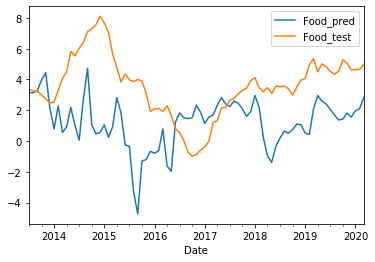

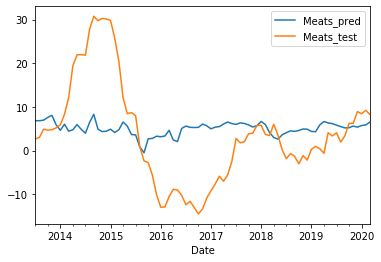

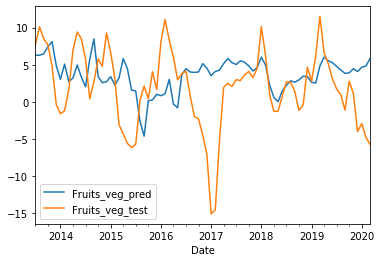

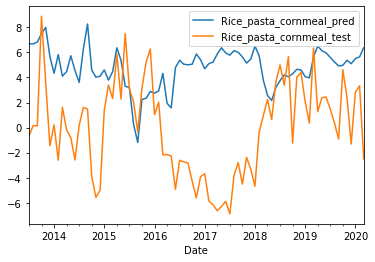

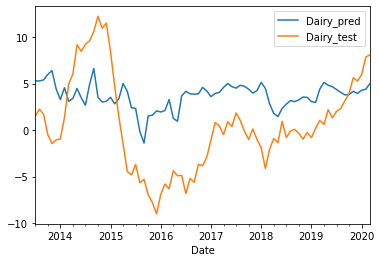

In [73]:
# plot the difference between pred and test
resultsdf_5mnth_lag[['Food_pred','Food_test']].plot()
resultsdf_5mnth_lag[['Meats_pred','Meats_test']].plot()
resultsdf_5mnth_lag[['Fruits_veg_pred','Fruits_veg_test']].plot()
resultsdf_5mnth_lag[['Rice_pasta_cornmeal_pred','Rice_pasta_cornmeal_test']].plot()
resultsdf_5mnth_lag[['Dairy_pred','Dairy_test']].plot()

In [74]:
# I want to see if the model get higher R^2 if I shorten the time frame to only after 2000 - around the time Ethanol became more widely used
#I also see that meat prices shot through the roof around COVID-19. I am going to avoid using those datapoints.
# I will keep the lag of 5 months
# create empty lists to populate a results Data Frame with the predicted results, the test results and the residuals
el5sh = []
la5sh = []
res5sh = []
r_25sh = []
for i in FFts.columns:
    fr5sh = str(i) + '_pred'
    ie5sh = str(i) + '_test'
    nd5sh = str(i) + '_residuals'
    r25sh = str(i) + '_r2'
    el5sh.append(fr5sh)
    la5sh.append(ie5sh)
    res5sh.append(nd5sh)
    r_25sh.append(r25sh)
resultsd_5lagsh = {}
for i in range(2,7):
    OLSModelsh = sm.OLS(FF3.iloc[209:407,i].values,FF3[['const','Ethanol']].iloc[204:402].values).fit()
    print(el5sh[i])
    print(OLSModelsh.summary())
    y_pred = OLSModelsh.predict(FF3[['Ethanol','const']].iloc[402:-8].values)
    resultsd_5lagsh[el5sh[i]] = y_pred
    resultsd_5lagsh[la5sh[i]] = FF3.iloc[407:-3,i]
    resultsd_5lagsh[res5sh[i]] = (y_pred - FF3.iloc[407:-3,i])
    resultsd_5lagsh[r_25sh[i]] = OLSModelsh.rsquared

Food_pred
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     30.31
Date:                Sun, 20 Sep 2020   Prob (F-statistic):           1.14e-07
Time:                        20:03:32   Log-Likelihood:                -481.53
No. Observations:                 198   AIC:                             967.1
Df Residuals:                     196   BIC:                             973.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9166      0.197     24.94

In [75]:
# create Data Frame with results
resultsdf_5mnth_lagsh = pd.DataFrame(resultsd_5lagsh)

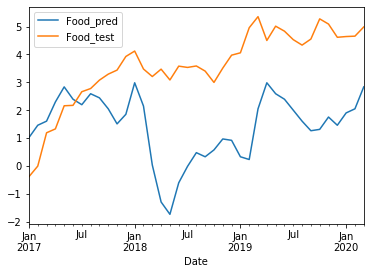

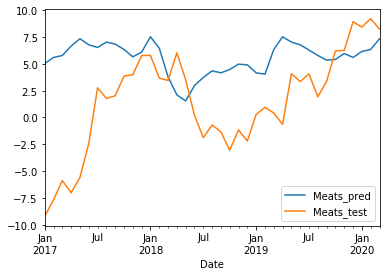

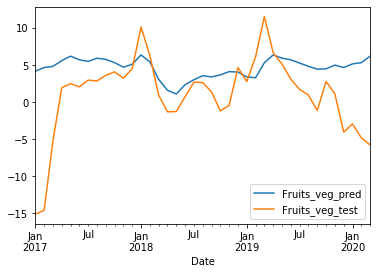

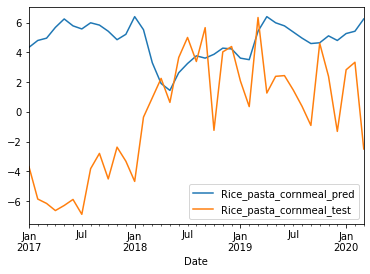

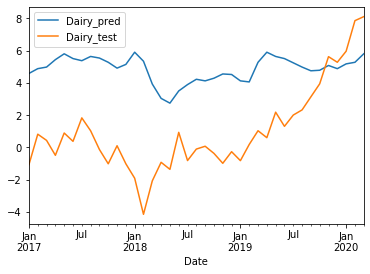

In [76]:
# plot the difference
resultsdf_5mnth_lagsh[['Food_pred','Food_test']].plot()
resultsdf_5mnth_lagsh[['Meats_pred','Meats_test']].plot()
resultsdf_5mnth_lagsh[['Fruits_veg_pred','Fruits_veg_test']].plot()
resultsdf_5mnth_lagsh[['Rice_pasta_cornmeal_pred','Rice_pasta_cornmeal_test']].plot()
resultsdf_5mnth_lagsh[['Dairy_pred','Dairy_test']].plot()